## Timing Benchmarks: Adaptive vs. Finite Derivative Methods

This section benchmarks the **runtime performance** of two numerical derivative estimation techniques:

- **Adaptive Polynomial Fitting**
- **Finite Difference Method**

The goal is to understand how computational cost scales with derivative order and method-specific parameters.

---

### 1. `benchmark_derivative_timing_vs_order`

This function evaluates the total execution time required to compute derivatives of a given function using both **adaptive** and **finite difference** methods across a range of derivative orders.

Each method is timed individually for a given order:

Plot Interpretation:
- The x-axis shows the derivative order (e.g. 1st, 2nd, 3rd).
- The y-axis shows the total evaluation time in seconds.
- You can compare how much slower the adaptive method is for higher-order derivatives.

---

### 2. `plot_adaptive_timing_sweeps`

This function benchmarks the adaptive method only, and investigates how its runtime changes as you sweep two of its internal parameters:
- `min_used_points`: The number of function evaluations used in the polynomial fit
- `fit_tolerance`: The RMS error threshold used to accept a candidate polynomial

The function runs two separate benchmark loops:
- First, it varies `min_used_points` while keeping `fit_tolerance` fixed.
- Then, it varies `fit_tolerance` while keeping `min_used_points` fixed.

Plot Interpretation:
- Left panel: Timing vs min_used_points (larger values = more data used for fitting)
- Right panel: Timing vs fit_tolerance (smaller values = stricter fits, more iterations)
- Results are shown for each derivative order with different line colors
- The log-scaled $x$-axis in the right plot emphasizes sensitivity to small tolerances

---

**Notes**
Both methods use `time.perf_counter()` to measure high-resolution wall-clock time.
Artificial delays (`sleep_time`) are used to simulate slow function evaluations and highlight overhead
These plots help understand the trade-off between speed and flexibility in adaptive differentiation.


In [1]:
import warnings

import numpy as np

from derivkit.plotutils.plot_style import apply_plot_style
from derivkit.plotutils import plot_kit as pk

# Apply consistent style
apply_plot_style()


In [2]:
# Suppressing warnings to keep notebook output clean for version control (e.g., Git).
# Comment out the line below if you want to see the warnings for debugging.
warnings.filterwarnings('ignore')

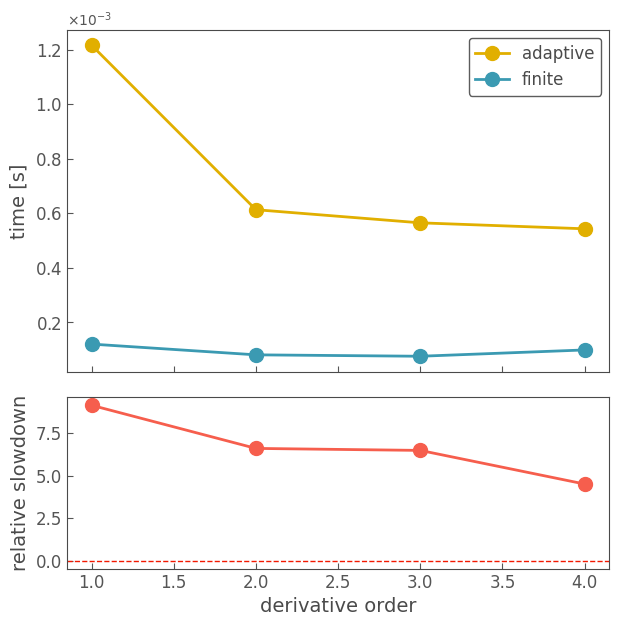

In [3]:
def function(x):
    return np.sin(x**2) * np.exp(-x**2) + np.log1p(x**2)
central_value = 0.0005

# Orders to test
orders = [1, 2, 3, 4]

pk.benchmark_derivative_timing_vs_order(function,
                                        central_value,
                                        orders)

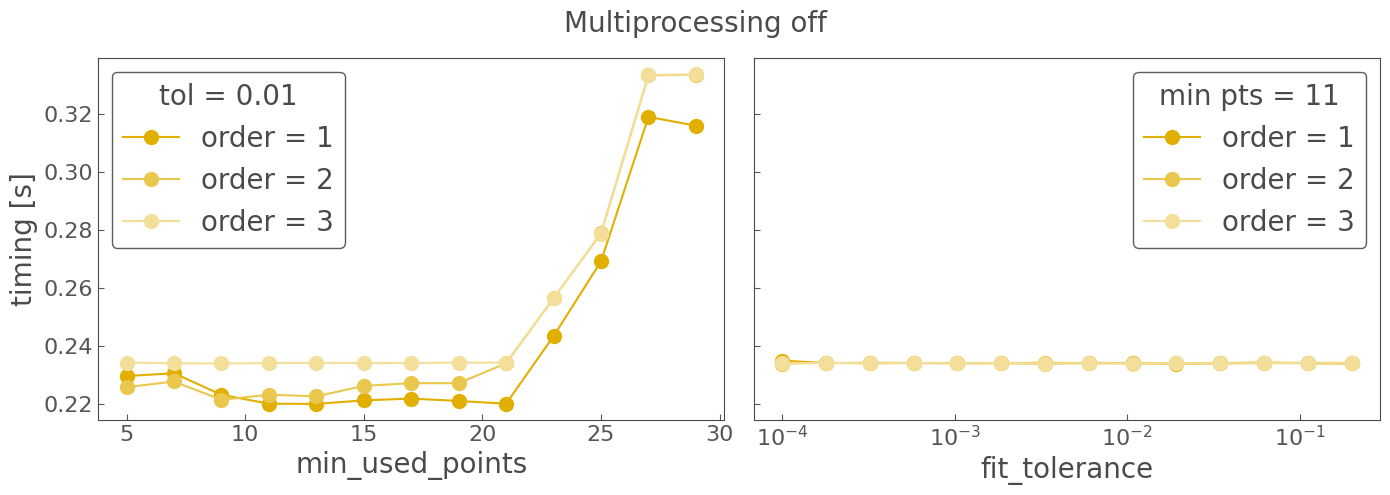

In [4]:
pk.plot_adaptive_timing_sweeps()


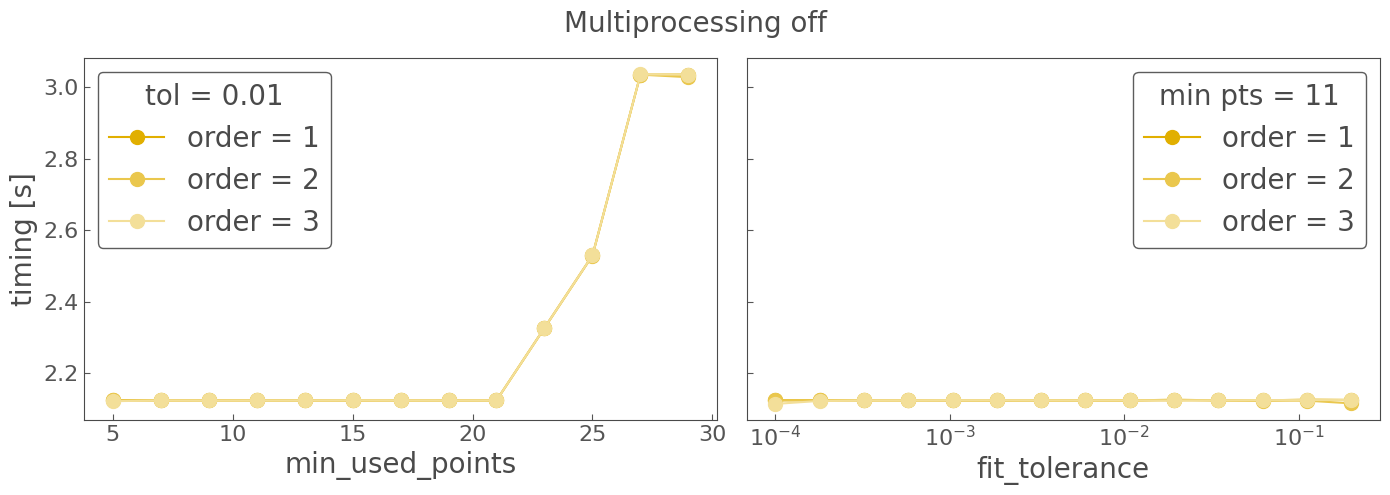

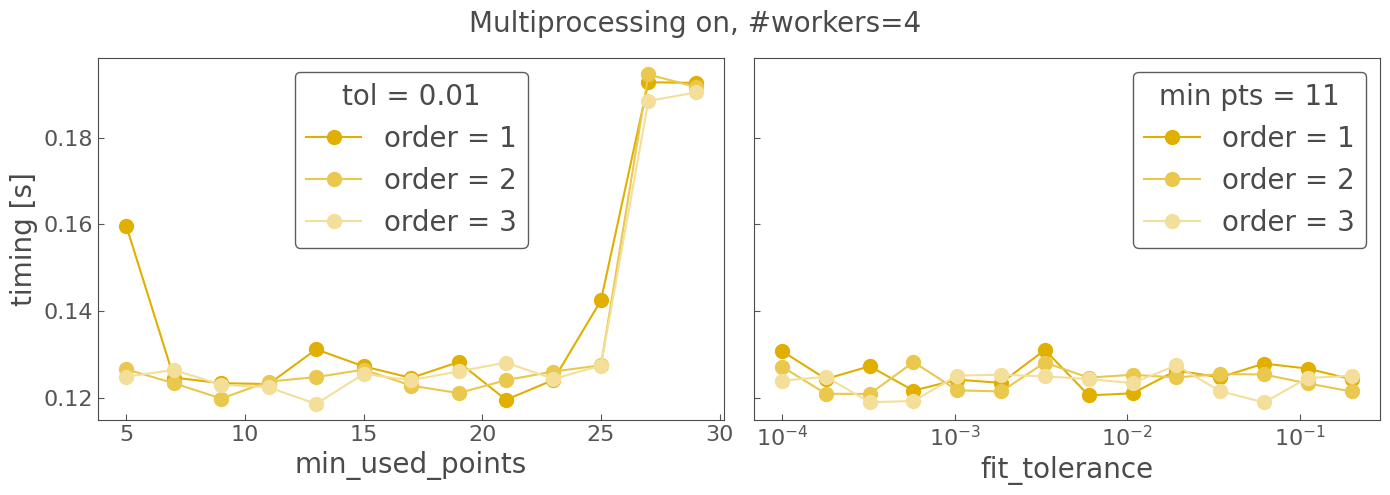

In [5]:
# Multiprocessing for intensive computation
sleep_time = 0.1 # 100ms comptutation time
pk.plot_adaptive_timing_sweeps(sleep_time=sleep_time, use_multiprocess=False)
pk.plot_adaptive_timing_sweeps(sleep_time=sleep_time, use_multiprocess=True, n_workers=4)